# 지하철 시간대별 자료 

### 데이터 정수 변환
 - map() 함수 사용
 - 리스트의 요소를 지정된 함수로 처리
 - 원본 리ㅡ트를 변경하지 않고 새 리스트를 생성
 - map(function, iterable)
   - 데이터에 적용할 함수, 함수를 적용할 데이터

In [3]:
def func(x):
    return x**2

a=[1,2,3,4]
a=list(map(func,a))
print(a)

data=['1','2','3','4']
data=list(map(int,data))
print(data)

[1, 4, 9, 16]
[1, 2, 3, 4]


#### 새벽 4시 지하철 승차 전체 인원

In [8]:
import csv

result=[]
total_number=0

with open('../Data/subwaytime.csv') as f:
    data=csv.reader(f)
    next(data)
    next(data)
    
    for row in data:
        row[4:]=map(int, row[4:])
        total_number+=row[4]
        result.append(row[4])

print('총 지하철 역의 수 : ',len(result))
print('총 새벽 4시 승차인원 : {:,}'.format(total_number))

총 지하철 역의 수 :  615
총 새벽 4시 승차인원 : 135,398


#### 새벽 4시 지하철 이용 인원수(그래프)

In [15]:
import matplotlib.pyplot as plt
import platform

with open('../Data/subwaytime.csv') as f:
    data=csv.reader(f)
    next(data)
    next(data)

    result=[]
    total_number=0
    max_num=0
    max_station=''

    for row in data:
        row[4:]=map(int, row[4:])
        total_number+=row[4]
        result.append(row[4])
        if (row[4]>max_num): 
            max_num=row[4]
            max_station=row[3]

print('새벽 4시 승차 인원수 : {:,}'.format(total_number))
print('최대 승차역 : {0}, 인원수 : {1:,}'.format(max_station, max_num))

새벽 4시 승차 인원수 : 135,398
최대 승차역 : 구로, 인원수 : 11,784


#### 정렬
 - .sort() 원본바꿈. 오름차순으로 정렬 // 내림차순 : result.sort(reverse=True)
 - .sorted() 원본 바꾸지 않고 정렬

<BarContainer object of 615 artists>

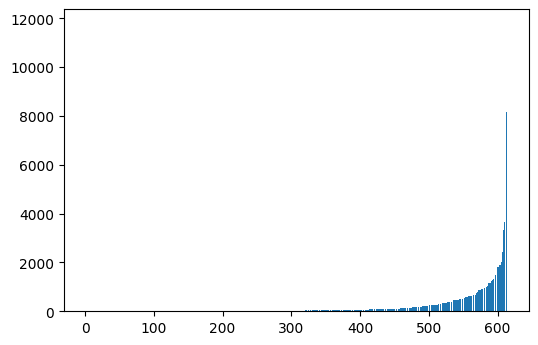

In [11]:
result.sort()
plt.figure(dpi=100)
plt.bar(range(len(result)),result)

#### 출근 시간대 지하철 이용 현황

최대 승차 인원역 : 신림(2호선) 638,753


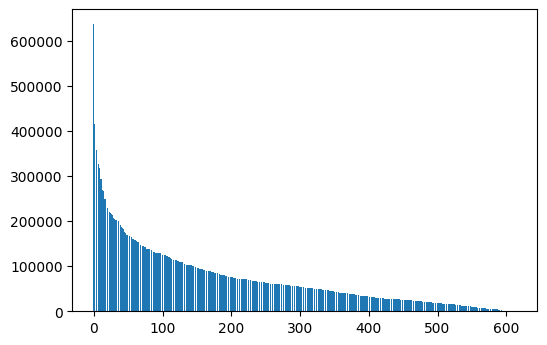

In [13]:
with open('../Data/subwaytime.csv') as f:
    data=csv.reader(f)
    next(data)
    next(data)
    result = []
    total_number = 0
    max_num = 0
    max_station = ''

    for row in data:
        row[4:] = map(int, row[4:])
        row_sum = sum(row[10:15:2])  # 10,12,14컬럼(7,8,9시 승차)
        # row_sum = row[10] + row[12] + row[14]
        result.append(row_sum)
        if row_sum>max_num:
            max_num=row_sum
            max_station=row[3]+'('+row[1]+')'

print('최대 승차 인원역 : {0} {1:,}'.format(max_station, max_num))
result.sort(reverse=True)

# 그래프 그리기
plt.figure(dpi=100)
plt.bar(range(len(result)),result)
plt.show()

### 시간대별 가장 많이 승차하는 역 정보 분석
 - 시간대 : 새벽 4시 ~ 다음날 새벽 2시(23개 데이터)

In [17]:
with open('../Data/subwaytime.csv') as f:
    data=csv.reader(f)
    next(data)
    next(data)
    
    max=[0]*23
    max_station = ['']*23
    xtick_list=[]

    for i in range(4,27):
        n=i%24                     # 4,5,6....23,0,1,2시로 표시
        xtick_list.append(str(n))  # x축 레이블

    for row in data:
        row[4:] = map(int, row[4:])
        
        for j in range(23):
            a=row[j*2+4]
            if a>max[j]:
                max[j]=a
                max_station[j]=xtick_list[j]+'시 : '+row[3]

    for i in range(len(max)):
        print('{0} : {1:,}'.format(max_station[i],max[i]),end=', ')
        if (i+1)%4==0: # 4개씩 출력
            print()

4시 : 구로 : 11,784, 5시 : 신림 : 38,809, 6시 : 신림 : 73,523, 7시 : 신림 : 188,110, 
8시 : 신림 : 281,017, 9시 : 신림 : 169,626, 10시 : 신림 : 91,989, 11시 : 신림 : 77,496, 
12시 : 잠실(송파구청) : 84,383, 13시 : 강남 : 95,697, 14시 : 강남 : 106,394, 15시 : 강남 : 131,625, 
16시 : 강남 : 154,526, 17시 : 강남 : 231,839, 18시 : 강남 : 314,775, 19시 : 강남 : 196,425, 
20시 : 강남 : 155,347, 21시 : 강남 : 180,108, 22시 : 강남 : 176,473, 23시 : 강남 : 81,016, 
0시 : 강남 : 12,407, 1시 : 건대입구 : 8, 2시 : 동묘앞 : 1, 

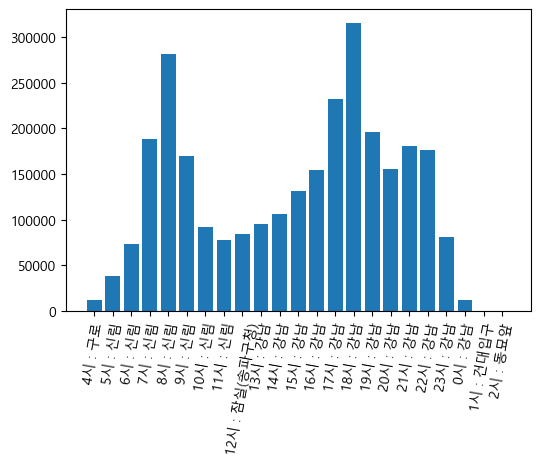

In [18]:
# 한글 글꼴
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')

else:
    plt.rc('font', family = 'AppleGothic')


plt.figure(dpi=100)
plt.bar(range(23), max)

                            # xtick 문자열을 각도 80도 회전
plt.xticks(range(23), max_station, rotation=80)
plt.show()


### Dictionary 정렬
 - Key를 기준으로 정렬
   - sort_dic = sorted(dic.tiems(), key=(lambda x: x[0])) # 기본:오름차순
 - Value를 기준으로 정렬
   - sort_dic = sorted(dic.tiems(), key=(lambda x: x[1]),reverce=True) # 내림차순

### 출퇴근 시간대 이용 현황

In [20]:
import pandas as pd

df=pd.read_excel('../Data/subway.xls',sheet_name='지하철 시간대별 이용현황', header=[0,1])
df

사용월                호선명                역ID  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0              2022-06                1호선                150   
1              2022-06                1호선                151   
2              2022-06                1호선                152   
3              2022-06                1호선                153   
4              2022-06                1호선                154   
..                 ...                ...                ...   
610            2022-06                신림선               4407   
611            2022-06                신림선               4408   
612            2022-06                신림선               4409   
613            2022-06                신림선               4410   
614            2022-06                신림선               4411   

                  지하철역 04:00:00~04:59:59     05:00:00~05:59:59         \
    Unnamed: 3_level_1                승차  하차                승차     하차   
0                  서울역               646  24             8,433  7,694   
1                   시청               271   7             3,133  4,802   
2                   종각                91   9             4,007  3,960   
3                 종로3가               190  12             3,882  3,261   
4                 종로5가                34   0             1,730  3,909   
..                 ...               ...  ..               ...    ...   
610                 당곡                 0   0             1,061    118   
611                 신림                 2   1               651    153   
612                 서원                 2   1             1,287    151   
613            서울대벤처타운                10   3             3,314    166   
614           관악산(서울대)                 2   5               475    742   

    06:00:00~06:59:59          ... 23:00:00~23:59:59 00:00:00~00:59:59         \
                   승차      하차  ...                하차                승차     하차   
0              12,608  46,963  ...            15,480               158  1,332   
1               3,321  23,621  ...             2,938                72    422   
2               3,682  22,533  ...             3,590               315    394   
3               3,570  14,038  ...             4,119               310    843   
4               2,986  16,406  ...             2,628                98    668   
..                ...     ...  ...               ...               ...    ...   
610             2,650     704  ...             2,710               156    637   
611               853     488  ...             2,023               177    629   
612             2,552     513  ...             3,281                68    782   
613             5,162   1,676  ...             7,279               180  1,974   
614             1,258   1,712  ...             1,224                90    412   

    01:00:00~01:59:59     02:00:00~02:59:59    03:00:00~03:59:59     \
                   승차  하차                승차 하차                승차 하차   
0                   1   4                 0  1                 0  0   
1                   0   2                 0  0                 0  0   
2                   0   1                 0  0                 0  0   
3                   3   3                 0  0                 0  0   
4                   0   0                 0  0                 0  0   
..                ...  ..               ... ..               ... ..   
610                 0   0                 0  0                 0  0   
611                 0   1                 0  0                 0  0   
612                 2   2                 0  0                 0  0   
613                 1  40                 0  0                 0  0   
614                 1  33                 0  0                 0  0   

                    작업일시  
     Unnamed: 52_level_1  
0    2022-07-03 09:48:05  
1    2022-07-03 09:48:05  
2    2022-07-03 09:48:05  
3    2022-07-03 09:48:05  
4    2022-07-03 09:48:05  
..                   ...  
610  2022-07-03 09:48:05  
611  2022-07-03

In [43]:
df.columns

MultiIndex([(              '사용월',  'Unnamed: 0_level_1'),
            (              '호선명',  'Unnamed: 1_level_1'),
            (              '역ID',  'Unnamed: 2_level_1'),
            (             '지하철역',  'Unnamed: 3_level_1'),
            ('04:00:00~04:59:59',                  '승차'),
            ('04:00:00~04:59:59',                  '하차'),
            ('05:00:00~05:59:59',                  '승차'),
            ('05:00:00~05:59:59',                  '하차'),
            ('06:00:00~06:59:59',                  '승차'),
            ('06:00:00~06:59:59',                  '하차'),
            ('07:00:00~07:59:59',                  '승차'),
            ('07:00:00~07:59:59',                  '하차'),
            ('08:00:00~08:59:59',                  '승차'),
            ('08:00:00~08:59:59',                  '하차'),
            ('09:00:00~09:59:59',                  '승차'),
            ('09:00:00~09:59:59',                  '하차'),
            ('10:00:00~10:59:59',                  '승차'),
            ('

In [ ]:
# 특정 컬럼 호출
df[('호선명','Unnamed: 1_level_1')]

In [23]:
df[('지하철역','Unnamed: 3_level_1')]

0           서울역
1            시청
2            종각
3          종로3가
4          종로5가
         ...   
610          당곡
611          신림
612          서원
613     서울대벤처타운
614    관악산(서울대)
Name: (지하철역, Unnamed: 3_level_1), Length: 615, dtype: object

#### 여러 컬럼 선택
 - iloc[row_index,col_index]   (iloc:interger location)


In [24]:
commute_time_df=df.iloc[:,[1,3,10,12,14]]
commute_time_df.head()

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,승차,승차,승차
0,1호선,서울역,"39,233","65,106","54,833"
1,1호선,시청,"6,647","8,294","9,211"
2,1호선,종각,"5,814","9,612","11,847"
3,1호선,종로3가,"4,746","8,589","13,179"
4,1호선,종로5가,"5,020","8,550","11,925"


In [27]:
commute_time_df.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                    object
08:00:00~08:59:59  승차                    object
09:00:00~09:59:59  승차                    object
dtype: object

#### 천단위 콤마 제거 : apply(lambda x : x.replace(',',''))
#### df.apply(func,axix=0) : df내 모든 요소에 함수 적용

In [30]:
# 천단위 콤마 제거
commute_time_df.iloc[:,2]=commute_time_df.iloc[:,2].apply(lambda x : x.replace(',',''))
commute_time_df.iloc[:,3]=commute_time_df.iloc[:,3].apply(lambda x : x.replace(',',''))
commute_time_df.iloc[:,4]=commute_time_df.iloc[:,4].apply(lambda x : x.replace(',',''))

commute_time_df

C:\Users\User\AppData\Local\Temp\ipykernel_19396\596133690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_time_df.iloc[:,2]=commute_time_df.iloc[:,2].apply(lambda x : x.replace(',',''))
C:\Users\User\AppData\Local\Temp\ipykernel_19396\596133690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_time_df.iloc[:,3]=commute_time_df.iloc[:,3].apply(lambda x : x.replace(',',''))
C:\Users\User\AppData\Local\Temp\ipykernel_19396\596133690.py:3: SettingWithCopyWarning: 
A value is trying to be 

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,승차,승차,승차
0,1호선,서울역,39233,65106,54833
1,1호선,시청,6647,8294,9211
2,1호선,종각,5814,9612,11847
3,1호선,종로3가,4746,8589,13179
4,1호선,종로5가,5020,8550,11925
...,...,...,...,...,...
610,신림선,당곡,7708,11603,6862
611,신림선,신림,3099,5402,2941
612,신림선,서원,8427,12646,7590


In [32]:
# 데이터 타입 변경 object -> int64

commute_time_df=commute_time_df.astype({('07:00:00~07:59:59', '승차'):'int64'})
commute_time_df=commute_time_df.astype({('08:00:00~08:59:59', '승차'):'int64'})
commute_time_df=commute_time_df.astype({('09:00:00~09:59:59', '승차'):'int64'})
commute_time_df.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                     int64
08:00:00~08:59:59  승차                     int64
09:00:00~09:59:59  승차                     int64
dtype: object

#### 각 행(지하철역)의 승차 인원 수 합 계산
  - 행(row)의 합 : df.sum(axis=1)
  - 열(colmns)의 합 : df.sum(axis=0)

In [39]:
row_sum_df=commute_time_df.sum(axis=1,numeric_only=True)
                                       # numeric_only=True 숫자만계산

passenger_number_list=row_sum_df.to_list() 
  # DataFrame을 리스트로 변환(그래프 쉽게 그리기위해)

print(passenger_number_list)

[159172, 24152, 27273, 26514, 25495, 50361, 62758, 74828, 111867, 24621, 20882, 40110, 27510, 20036, 26595, 96726, 135277, 98541, 19338, 60455, 76233, 200286, 240949, 266708, 109806, 379023, 169326, 52234, 52803, 81644, 61350, 148582, 88819, 68114, 78963, 249022, 279179, 408769, 266976, 638753, 294686, 415838, 218013, 349991, 114408, 109760, 128942, 132499, 188177, 121187, 76589, 88415, 50503, 27262, 21936, 16394, 8742, 79681, 118347, 18410, 58209, 201246, 357596, 142702, 184695, 173199, 39698, 46458, 53515, 25297, 7498, 10425, 0, 20618, 89594, 82619, 72729, 58894, 41157, 36729, 114064, 31908, 103855, 108906, 50767, 27239, 62964, 11566, 78547, 61663, 104872, 56395, 61454, 68477, 94642, 198012, 137508, 214781, 317323, 304253, 128426, 248467, 216622, 129003, 90113, 60715, 25058, 23845, 36870, 23293, 22056, 39135, 61052, 23468, 41479, 40167, 7028, 141809, 220773, 8678, 44985, 40939, 89430, 52871, 81527, 135809, 27958, 71596, 102938, 41949, 114108, 94555, 77757, 202574, 60475, 227461, 4699

In [40]:
# 최대값 및 최대값 인덱스 찾기
max_number=row_sum_df.max(axis=0)
max_number

638753

In [41]:
max_index = row_sum_df.idxmax()
max_line, max_station = df.iloc[max_index, [1, 3]]

print('출근 시간대 최대 승차 인원역 : {0} {1} {2:,}명'.format(max_line,max_station,max_number))

출근 시간대 최대 승차 인원역 : 2호선 신림 638,753명


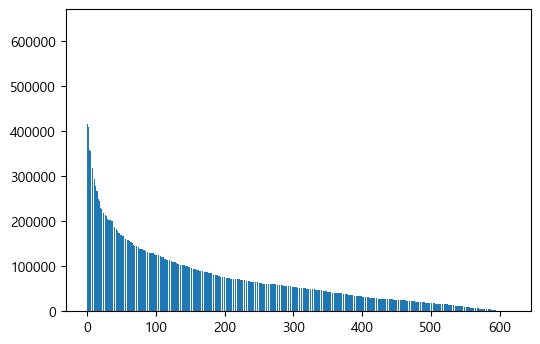

In [42]:
# bar-chart 그리기
passenger_number_list.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(passenger_number_list)), passenger_number_list)
plt.show()
